# Task 1: 
**Do the biomarker levels at inclusion vary between males and females?**

## Library Imports

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

## Loading, merging and sorting original data

**Reading and merging datasets, leaving only necessary rows and columns**

In [109]:
biomarkers = pd.read_excel('biomarkers.xlsx')
biomarkers

,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,126-0weeks,7.63,11.51,10.20,8.83,3.52,6.16,9.45,7.91,8.41
1,126-6weeks,7.12,11.59,10.41,8.87,3.89,6.12,9.06,7.92,8.39
2,127-0weeks,6.93,10.92,10.30,6.59,2.73,6.14,7.31,7.95,8.40
3,127-6weeks,7.16,11.58,10.39,8.61,2.60,6.35,8.61,7.94,8.51
4,127-12months,6.87,11.13,10.25,7.44,3.92,6.15,8.79,7.94,8.46
...,...,...,...,...,...,...,...,...,...,...
342,121-6weeks,7.21,12.89,10.69,8.90,3.14,5.97,8.00,8.17,8.42
343,121-12months,6.35,11.01,9.96,6.70,2.55,4.68,7.34,7.76,8.11
344,122-0weeks,7.86,12.80,10.73,9.30,2.93,6.73,9.60,8.25,8.60
345,122-6weeks,8.52,13.04,10.81,8.79,2.94,6.73,9.64,8.19,8.64


In [110]:
biomarkers.dtypes

Biomarker      object
IL-8          float64
VEGF-A        float64
OPG           float64
TGF-beta-1    float64
IL-6          float64
CXCL9         float64
CXCL1         float64
IL-18         float64
CSF-1         float64
dtype: object

In [111]:
biomarkers['PatientID'] = biomarkers['Biomarker'].str.split('-').str[0].astype('int64')
biomarkers['Period'] = biomarkers['Biomarker'].str.split('-').str[1]
biomarkers

,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1,PatientID,Period
0,126-0weeks,7.63,11.51,10.20,8.83,3.52,6.16,9.45,7.91,8.41,126,0weeks
1,126-6weeks,7.12,11.59,10.41,8.87,3.89,6.12,9.06,7.92,8.39,126,6weeks
2,127-0weeks,6.93,10.92,10.30,6.59,2.73,6.14,7.31,7.95,8.40,127,0weeks
3,127-6weeks,7.16,11.58,10.39,8.61,2.60,6.35,8.61,7.94,8.51,127,6weeks
4,127-12months,6.87,11.13,10.25,7.44,3.92,6.15,8.79,7.94,8.46,127,12months
...,...,...,...,...,...,...,...,...,...,...,...,...
342,121-6weeks,7.21,12.89,10.69,8.90,3.14,5.97,8.00,8.17,8.42,121,6weeks
343,121-12months,6.35,11.01,9.96,6.70,2.55,4.68,7.34,7.76,8.11,121,12months
344,122-0weeks,7.86,12.80,10.73,9.30,2.93,6.73,9.60,8.25,8.60,122,0weeks
345,122-6weeks,8.52,13.04,10.81,8.79,2.94,6.73,9.64,8.19,8.64,122,6weeks


In [112]:
covariates = pd.read_excel('covariates.xlsx')
covariates

,PatientID,Age,"Sex (1=male, 2=female)","Smoker (1=yes, 2=no)",VAS-at-inclusion,Vas-12months
0,1,56,1,2,3.0,4.0
1,3,32,1,2,7.2,0.5
2,4,43,2,2,2.7,0.5
3,5,25,2,2,3.0,3.9
4,6,39,1,2,3.5,5.0
...,...,...,...,...,...,...
113,143,55,1,1,6.0,2.0
114,149,46,2,2,5.0,9.0
115,150,57,1,1,1.0,9.0
116,151,25,2,2,8.0,6.0


In [113]:
covariates.dtypes

PatientID                   int64
Age                         int64
Sex (1=male, 2=female)      int64
Smoker (1=yes, 2=no)        int64
VAS-at-inclusion          float64
Vas-12months              float64
dtype: object

In [114]:
data = covariates[['PatientID', 'Sex (1=male, 2=female)']].merge(biomarkers.drop(columns=['Biomarker']), how='left', on='PatientID')

In [115]:
data['Sex (1=male, 2=female)'] = data['Sex (1=male, 2=female)'].replace({1: 'Male', 2:'Female'})
data = data.rename(columns={'Sex (1=male, 2=female)':'Sex'})
data = data[data['Period'] == '0weeks']
data = data.drop_duplicates()
data = data.drop('Period', axis=1)

data

,PatientID,Sex,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
0,1,Male,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27
3,3,Male,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30
6,4,Female,6.47,11.13,10.72,6.90,5.62,5.46,7.73,8.02,8.19
9,5,Female,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10
12,6,Male,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35
...,...,...,...,...,...,...,...,...,...,...,...
332,143,Male,6.67,11.12,10.60,6.55,3.41,6.67,6.60,7.26,8.32
335,149,Female,8.58,12.90,11.30,9.42,3.82,6.75,10.12,9.15,9.23
338,150,Male,6.15,11.05,10.43,7.16,4.47,6.06,6.36,7.95,8.48
341,151,Female,7.98,11.89,10.79,7.71,5.90,7.51,9.41,8.61,9.24


## Preparing Data for Statistical Testing

In this section, I make sure the resulting dataset is clean, balanced and consistent; check data distributions, skewness and outliers and perform log transformations to make informed decisions about further statistical tests

In [117]:
data.dtypes

PatientID       int64
Sex            object
IL-8          float64
VEGF-A        float64
OPG           float64
TGF-beta-1    float64
IL-6          float64
CXCL9         float64
CXCL1         float64
IL-18         float64
CSF-1         float64
dtype: object

In [118]:
data.nunique()

PatientID     117
Sex             2
IL-8           97
VEGF-A         90
OPG            75
TGF-beta-1    100
IL-6           93
CXCL9          92
CXCL1         106
IL-18          89
CSF-1          71
dtype: int64

In [119]:
data = data.replace([np.inf, -np.inf], np.nan)
data.isna().sum()

PatientID     0
Sex           0
IL-8          0
VEGF-A        0
OPG           0
TGF-beta-1    0
IL-6          0
CXCL9         0
CXCL1         0
IL-18         0
CSF-1         0
dtype: int64

In [120]:
print(f"Number of male participants: {data[data['Sex'] == 'Male'].shape[0]}")
print(f"Number of female participants: {data[data['Sex'] == 'Female'].shape[0]}")

Number of male participants: 59
Number of female participants: 58


In [121]:
biomarker_cols = ['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1']

In [122]:
shapiro_wilk_original = {column: stats.shapiro(data[column]) for column in biomarker_cols}
shapiro_wilk_original_dict = {column: res.pvalue for column, res in shapiro_wilk_original.items()}

shapiro_wilk_original_df = pd.DataFrame(
    list(shapiro_wilk_original_dict.items()), columns=["Biomarker", "Shapiro-Wilk p-value"]
)
shapiro_wilk_original_df["Shapiro-Wilk p-value"] = shapiro_wilk_original_df["Shapiro-Wilk p-value"].round(5)
shapiro_wilk_original_df

,Biomarker,Shapiro-Wilk p-value
0,IL-8,0.00660
1,VEGF-A,0.05401
2,OPG,0.00040
3,TGF-beta-1,0.00003
4,IL-6,0.00000
5,CXCL9,0.00000
6,CXCL1,0.00002
7,IL-18,0.71112
8,CSF-1,0.00280


In [123]:
data[biomarker_cols].agg(['skew', 'kurtosis']).round(2)

,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1
skew,0.48,0.19,0.64,-0.32,1.49,2.42,-0.43,0.13,0.82
kurtosis,1.56,-0.81,0.86,-1.16,3.47,10.54,-0.97,-0.17,1.85


In [124]:
Q1 = data[biomarker_cols].quantile(0.25)
Q3 = data[biomarker_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data[biomarker_cols] < (Q1 - 1.5 * IQR)) | (data[biomarker_cols] > (Q3 + 1.5 * IQR))).sum()
outliers_percentage = (outliers_iqr / len(data)) * 100

outliers_df = pd.DataFrame({"Outliers": outliers_iqr, "Percentage (%)": round(outliers_percentage, 2)})
outliers_df

,Outliers,Percentage (%)
IL-8,1,0.85
VEGF-A,0,0.00
OPG,10,8.55
TGF-beta-1,0,0.00
IL-6,4,3.42
CXCL9,3,2.56
CXCL1,0,0.00
IL-18,0,0.00
CSF-1,1,0.85


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

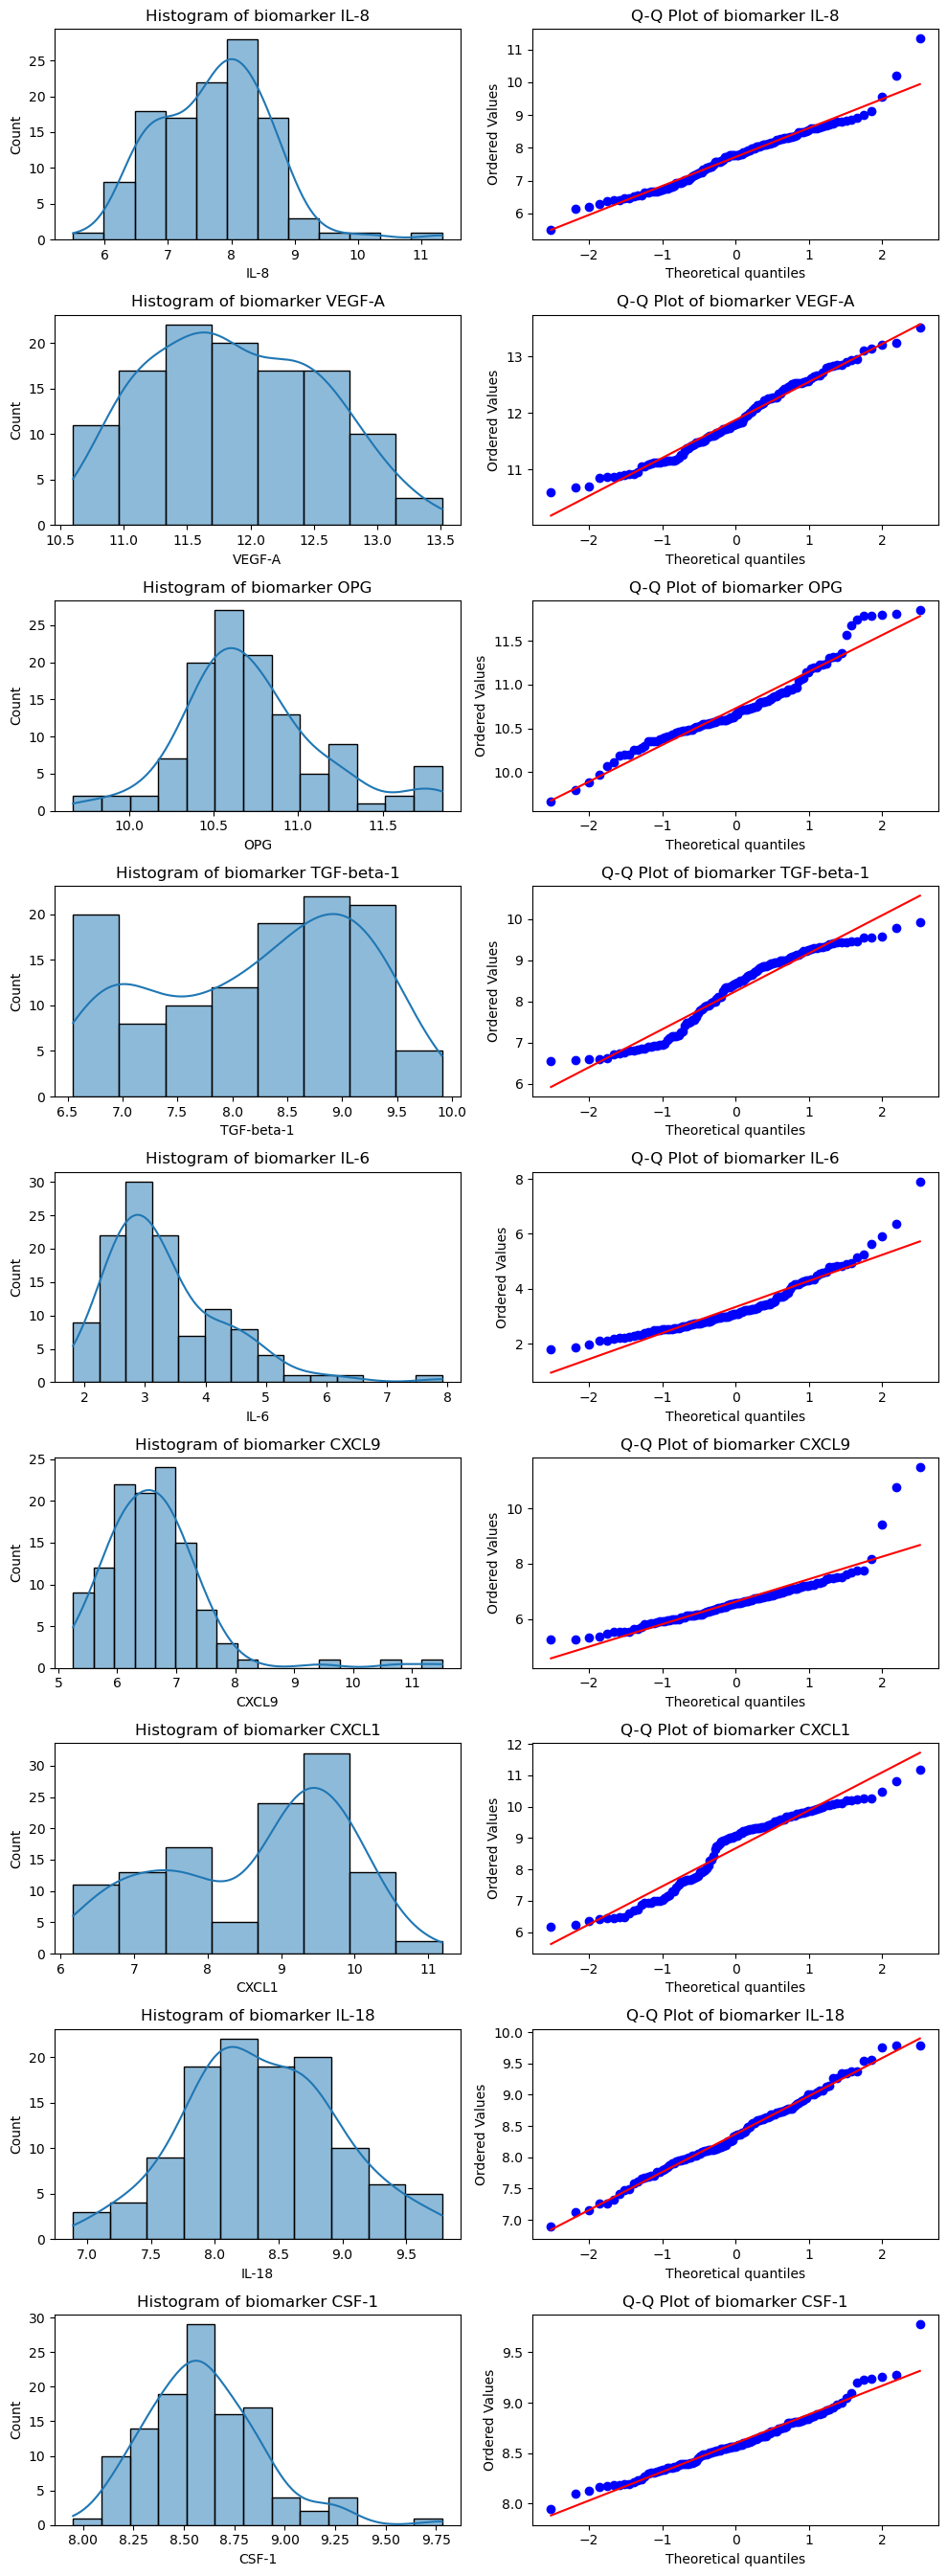

In [125]:
fig, axes = plt.subplots(len(biomarker_cols), 2, figsize=(10, 3 * len(biomarker_cols)))

for i, biomarker in enumerate(biomarker_cols):
    sns.histplot(data[biomarker], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histogram of biomarker {biomarker}")

    stats.probplot(data[biomarker].dropna(), dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"Q-Q Plot of biomarker {biomarker}")

plt.tight_layout()
plt.show()

In [126]:
for biomarker in biomarker_cols:
    data[f'log_{biomarker}'] = np.log1p(data[biomarker])

In [127]:
biomarker_cols_logs = [column for column in data if 'log' in column]
shapiro_wilk_log = {col: stats.shapiro(data[f'log_{col}']) for col in biomarker_cols}


shapiro_results_df = pd.DataFrame({
    "Biomarker": biomarker_cols,
    "Shapiro-Wilk p-value (Original)": [round(shapiro_wilk_original[col].pvalue, 5) for col in biomarker_cols],
    "Shapiro-Wilk p-value (Log Transformed)": [round(shapiro_wilk_log[col].pvalue, 5) for col in biomarker_cols]
})

shapiro_results_df

,Biomarker,Shapiro-Wilk p-value (Original),Shapiro-Wilk p-value (Log Transformed)
0,IL-8,0.00660,0.06400
1,VEGF-A,0.05401,0.07559
2,OPG,0.00040,0.00149
3,TGF-beta-1,0.00003,0.00001
4,IL-6,0.00000,0.00301
5,CXCL9,0.00000,0.00000
6,CXCL1,0.00002,0.00000
7,IL-18,0.71112,0.81979
8,CSF-1,0.00280,0.01382


In [128]:
skew_kurt_original = data[biomarker_cols].agg(['skew', 'kurtosis'])
skew_kurt_log = data[[f'log_{col}' for col in biomarker_cols]].agg(['skew', 'kurtosis'])

skew_kurt_comparison = pd.DataFrame({
    "Biomarker": biomarker_cols,
    "Skew (Original)": skew_kurt_original.loc["skew"].values,
    "Skew (Log Transformed)": skew_kurt_log.loc["skew"].values,
    "Kurtosis (Original)": skew_kurt_original.loc["kurtosis"].values,
    "Kurtosis (Log Transformed)": skew_kurt_log.loc["kurtosis"].values
})

skew_kurt_comparison.round(2)

,Biomarker,Skew (Original),Skew (Log Transformed),Kurtosis (Original),Kurtosis (Log Transformed)
0,IL-8,0.48,0.06,1.56,0.60
1,VEGF-A,0.19,0.10,-0.81,-0.85
2,OPG,0.64,0.51,0.86,0.78
3,TGF-beta-1,-0.32,-0.43,-1.16,-1.10
4,IL-6,1.49,0.75,3.47,0.65
5,CXCL9,2.42,1.52,10.54,5.56
6,CXCL1,-0.43,-0.59,-0.97,-0.85
7,IL-18,0.13,-0.04,-0.17,-0.15
8,CSF-1,0.82,0.69,1.85,1.45


## Performing statistical tests

In [130]:
normally_distr_biomarkers = ["IL-8", "VEGF-A", "IL-18"]
abnormally_distr_biomarkers = ["OPG", "TGF-beta-1", "IL-6", "CXCL9", "CXCL1", "CSF-1"]

test_results = {}

# t-tests for normally distributed biomarkers
for biomarker in normally_distr_biomarkers:
    male_values = data[data["Sex"] == "Male"][biomarker].dropna()
    female_values = data[data["Sex"] == "Female"][biomarker].dropna()
    
    t_stat, p_value = stats.ttest_ind(male_values, female_values, equal_var=False)  
    test_results[biomarker] = {"test": "T-test", "p-value": p_value}
    test_results[biomarker]['significant (p-value)'] = test_results[biomarker]['p-value'] < 0.05

# Mann-Whitney U tests for non-normal biomarkers
for biomarker in abnormally_distr_biomarkers:
    male_values = data[data["Sex"] == "Male"][biomarker].dropna()
    female_values = data[data["Sex"] == "Female"][biomarker].dropna()
    
    u_stat, p_value = stats.mannwhitneyu(male_values, female_values, alternative="two-sided")
    test_results[biomarker] = {"test": "Mann-Whitney U", "p-value": p_value}
    test_results[biomarker]['significant (p-value)'] = test_results[biomarker]['p-value'] < 0.05

test_results_df = pd.DataFrame.from_dict(test_results, orient="index")
test_results_df

,test,p-value,significant (p-value)
IL-8,T-test,0.329073,False
VEGF-A,T-test,0.041620,True
IL-18,T-test,0.249382,False
OPG,Mann-Whitney U,0.065356,False
TGF-beta-1,Mann-Whitney U,0.051628,False
IL-6,Mann-Whitney U,0.359722,False
CXCL9,Mann-Whitney U,0.861507,False
CXCL1,Mann-Whitney U,0.003242,True
CSF-1,Mann-Whitney U,0.011145,True


In [131]:
tests_num = len(biomarker_cols)
bonferroni_alpha = 0.05 / tests_num

for biomarker in test_results:
    adjusted_p = test_results[biomarker]["p-value"] * tests_num
    test_results[biomarker]["Bonferroni Adjusted p-value"] = min(adjusted_p, 1.0) 
    test_results[biomarker]["significant (Bonferroni)"] = adjusted_p < bonferroni_alpha

bonferroni_results_df = pd.DataFrame.from_dict(test_results, orient="index")
bonferroni_results_df

,test,p-value,significant (p-value),Bonferroni Adjusted p-value,significant (Bonferroni)
IL-8,T-test,0.329073,False,1.000000,False
VEGF-A,T-test,0.041620,True,0.374581,False
IL-18,T-test,0.249382,False,1.000000,False
OPG,Mann-Whitney U,0.065356,False,0.588205,False
TGF-beta-1,Mann-Whitney U,0.051628,False,0.464648,False
IL-6,Mann-Whitney U,0.359722,False,1.000000,False
CXCL9,Mann-Whitney U,0.861507,False,1.000000,False
CXCL1,Mann-Whitney U,0.003242,True,0.029176,False
CSF-1,Mann-Whitney U,0.011145,True,0.100302,False


# Task 2: 
**Regression modelling**

## Library Imports

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading, merging and sorting original data

In [136]:
biomarkers = pd.read_excel('biomarkers.xlsx')

biomarkers['PatientID'] = biomarkers['Biomarker'].str.split('-').str[0].astype('int64')
biomarkers['Period'] = biomarkers['Biomarker'].str.split('-').str[1]

biomarkers

,Biomarker,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1,PatientID,Period
0,126-0weeks,7.63,11.51,10.20,8.83,3.52,6.16,9.45,7.91,8.41,126,0weeks
1,126-6weeks,7.12,11.59,10.41,8.87,3.89,6.12,9.06,7.92,8.39,126,6weeks
2,127-0weeks,6.93,10.92,10.30,6.59,2.73,6.14,7.31,7.95,8.40,127,0weeks
3,127-6weeks,7.16,11.58,10.39,8.61,2.60,6.35,8.61,7.94,8.51,127,6weeks
4,127-12months,6.87,11.13,10.25,7.44,3.92,6.15,8.79,7.94,8.46,127,12months
...,...,...,...,...,...,...,...,...,...,...,...,...
342,121-6weeks,7.21,12.89,10.69,8.90,3.14,5.97,8.00,8.17,8.42,121,6weeks
343,121-12months,6.35,11.01,9.96,6.70,2.55,4.68,7.34,7.76,8.11,121,12months
344,122-0weeks,7.86,12.80,10.73,9.30,2.93,6.73,9.60,8.25,8.60,122,0weeks
345,122-6weeks,8.52,13.04,10.81,8.79,2.94,6.73,9.64,8.19,8.64,122,6weeks


In [137]:
covariates = pd.read_excel('covariates.xlsx')
covariates

,PatientID,Age,"Sex (1=male, 2=female)","Smoker (1=yes, 2=no)",VAS-at-inclusion,Vas-12months
0,1,56,1,2,3.0,4.0
1,3,32,1,2,7.2,0.5
2,4,43,2,2,2.7,0.5
3,5,25,2,2,3.0,3.9
4,6,39,1,2,3.5,5.0
...,...,...,...,...,...,...
113,143,55,1,1,6.0,2.0
114,149,46,2,2,5.0,9.0
115,150,57,1,1,1.0,9.0
116,151,25,2,2,8.0,6.0


In [138]:
data = covariates.merge(biomarkers.drop('Biomarker', axis=1), how='left', on='PatientID')
data

,PatientID,Age,"Sex (1=male, 2=female)","Smoker (1=yes, 2=no)",VAS-at-inclusion,Vas-12months,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1,Period
0,1,56,1,2,3.0,4.0,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27,0weeks
1,1,56,1,2,3.0,4.0,7.09,11.61,10.35,7.59,2.25,7.84,9.44,8.42,8.19,6weeks
2,1,56,1,2,3.0,4.0,8.64,12.48,10.68,8.46,2.56,6.64,9.59,8.79,8.41,12months
3,3,32,1,2,7.2,0.5,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30,0weeks
4,3,32,1,2,7.2,0.5,6.40,11.20,10.61,6.65,2.25,5.51,6.62,7.79,8.35,6weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,151,25,2,2,8.0,6.0,6.09,10.21,10.41,5.64,2.78,6.72,5.86,8.46,8.32,6weeks
343,151,25,2,2,8.0,6.0,6.32,10.68,10.64,5.93,2.00,6.40,7.26,7.74,8.64,12months
344,152,53,1,2,9.0,1.2,6.93,10.95,10.46,6.62,2.64,6.32,6.17,8.12,8.16,0weeks
345,152,53,1,2,9.0,1.2,6.99,11.19,10.81,6.87,2.46,6.30,6.37,8.26,8.22,6weeks


In [139]:
data = data.loc[data['Period'] == '0weeks'].copy()  
data.loc[:, 'Sex'] = data['Sex (1=male, 2=female)'].replace({1:1, 2:0})
data.loc[:, 'Smoker'] = data['Smoker (1=yes, 2=no)'].replace({1:1, 2:0})

In [140]:
data = data.reset_index(drop=True)
data = data.drop(['Period', 'Sex (1=male, 2=female)', 'Smoker (1=yes, 2=no)'], axis=1)
data = data.dropna()

## Training the model

In [142]:
biomarker_cols = ['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1']
covariate_columns = ['Sex', 'Age', 'Smoker', 'VAS-at-inclusion']

In [143]:
X = data[biomarker_cols + covariate_columns].dropna()
Y = data['Vas-12months']
Y = Y.loc[X.index]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [145]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [146]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lr_model.coef_})
coefficients

,Feature,Coefficient
0,IL-8,0.939501
1,VEGF-A,1.471997
2,OPG,-1.856617
3,TGF-beta-1,-0.972990
4,IL-6,0.967063
5,CXCL9,-0.285120
6,CXCL1,-0.364636
7,IL-18,-0.609031
8,CSF-1,2.162968
9,Sex,-0.095023


In [147]:
y_train_pred = lr_model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_train_pred_dict = {"Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R-squared (R²)"],
    "Value": [round(train_mae, 4), round(train_mse, 4), round(train_r2, 4)]}

y_train_pred_df = pd.DataFrame(y_train_pred_dict)
y_train_pred_df

,Metric,Value
0,Mean Absolute Error (MAE),2.0578
1,Mean Squared Error (MSE),6.2681
2,R-squared (R²),0.3328


In [148]:
y_test_pred = lr_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

y_test_pred_dict = {"Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R-squared (R²)"],
    "Value": [round(test_mae, 4), round(test_mse, 4), round(test_r2, 4)]}

y_train_pred_df = pd.DataFrame(y_test_pred_dict)
y_train_pred_df

,Metric,Value
0,Mean Absolute Error (MAE),2.2670
1,Mean Squared Error (MSE),7.5952
2,R-squared (R²),0.2195


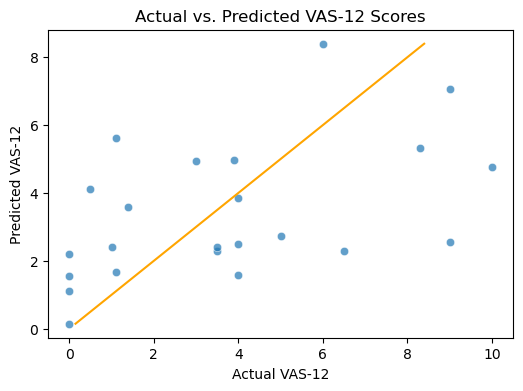

In [149]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test_pred.min(), y_test_pred.max()], [y_test_pred.min(), y_test_pred.max()], color='orange') 
plt.xlabel("Actual VAS-12")
plt.ylabel("Predicted VAS-12")
plt.title("Actual vs. Predicted VAS-12 Scores")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


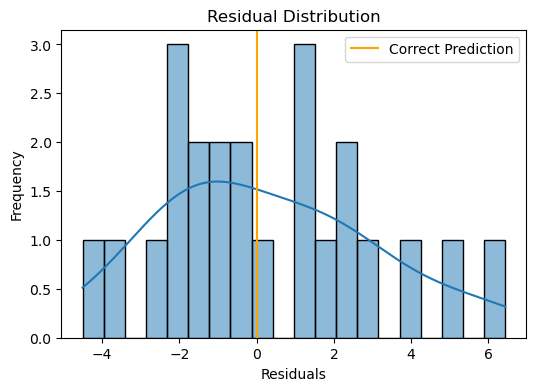

In [150]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=20)
plt.axvline(0, color='orange', label="Correct Prediction")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.legend()
plt.show()

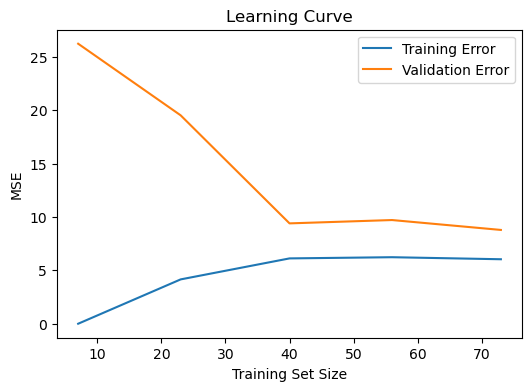

In [151]:
train_sizes, train_scores, val_scores = learning_curve(lr_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

train_mean = -np.mean(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Training Error")
plt.plot(train_sizes, val_mean, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend()
plt.show()

**Model trained with a dataset containing no outliers**

In [153]:
biomarker_cols = ['IL-8', 'VEGF-A', 'OPG', 'TGF-beta-1', 'IL-6', 'CXCL9', 'CXCL1', 'IL-18', 'CSF-1']
Q1 = data[biomarker_cols].quantile(0.25)
Q3 = data[biomarker_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data[biomarker_cols] < (Q1 - 1.5 * IQR)) | (data[biomarker_cols] > (Q3 + 1.5 * IQR))).sum()
outliers_percentage = (outliers_iqr / len(data)) * 100

outliers_df = pd.DataFrame({"Outliers": outliers_iqr, "Percentage (%)": round(outliers_percentage, 2)})
outliers_df

,Outliers,Percentage (%)
IL-8,1,0.87
VEGF-A,0,0.00
OPG,10,8.70
TGF-beta-1,0,0.00
IL-6,4,3.48
CXCL9,3,2.61
CXCL1,0,0.00
IL-18,0,0.00
CSF-1,1,0.87


In [154]:
outliers = (data[biomarker_cols] < (Q1 - 1.5 * IQR)) | (data[biomarker_cols] > (Q3 + 1.5 * IQR))
data_no_outliers = data[~outliers.any(axis=1)]

data_no_outliers

,PatientID,Age,VAS-at-inclusion,Vas-12months,IL-8,VEGF-A,OPG,TGF-beta-1,IL-6,CXCL9,CXCL1,IL-18,CSF-1,Sex,Smoker
0,1,56,3.0,4.0,8.13,12.35,10.48,8.66,2.63,6.54,9.54,8.53,8.27,1,0
1,3,32,7.2,0.5,6.55,11.21,10.49,6.83,2.58,5.31,6.71,7.71,8.30,1,0
3,5,25,3.0,3.9,6.41,11.15,10.60,7.26,1.96,5.35,7.15,7.66,8.10,0,0
4,6,39,3.5,5.0,6.54,11.47,10.20,7.16,3.38,6.51,7.79,8.54,8.35,1,0
5,7,38,7.0,3.0,6.92,11.06,10.28,7.17,2.48,6.41,6.94,8.78,8.17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,142,55,4.0,0.0,7.72,11.12,11.31,7.12,4.29,6.61,6.47,8.73,8.24,1,1
112,143,55,6.0,2.0,6.67,11.12,10.60,6.55,3.41,6.67,6.60,7.26,8.32,1,1
113,149,46,5.0,9.0,8.58,12.90,11.30,9.42,3.82,6.75,10.12,9.15,9.23,0,0
114,150,57,1.0,9.0,6.15,11.05,10.43,7.16,4.47,6.06,6.36,7.95,8.48,1,1


In [155]:
X = data_no_outliers[biomarker_cols + covariate_columns].dropna()
Y = data_no_outliers['Vas-12months']
Y = Y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [156]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [157]:
y_test_pred = lr_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

y_test_pred_dict = {"Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R-squared (R²)"],
    "Value": [round(test_mae, 4), round(test_mse, 4), round(test_r2, 4)]}

y_train_pred_df = pd.DataFrame(y_test_pred_dict)
y_train_pred_df

,Metric,Value
0,Mean Absolute Error (MAE),2.0338
1,Mean Squared Error (MSE),5.7129
2,R-squared (R²),0.2870
